In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv('Summer-Olympic-medals-1976-to-2008 (1).csv' , encoding='latin1')

In [3]:
print(df.head())

       City    Year     Sport Discipline           Event  \
0  Montreal  1976.0  Aquatics     Diving  3m springboard   
1  Montreal  1976.0  Aquatics     Diving  3m springboard   
2  Montreal  1976.0  Aquatics     Diving  3m springboard   
3  Montreal  1976.0  Aquatics     Diving  3m springboard   
4  Montreal  1976.0  Aquatics     Diving    10m platform   

                    Athlete Gender Country_Code        Country Event_gender  \
0           KÖHLER, Christa  Women          GDR   East Germany            W   
1       KOSENKOV, Aleksandr    Men          URS   Soviet Union            M   
2      BOGGS, Philip George    Men          USA  United States            M   
3  CAGNOTTO, Giorgio Franco    Men          ITA          Italy            M   
4    WILSON, Deborah Keplar  Women          USA  United States            W   

    Medal  
0  Silver  
1  Bronze  
2    Gold  
3  Silver  
4  Bronze  


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15433 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.3+ MB
None


In [5]:
print(df.describe())

               Year
count  15316.000000
mean    1993.620789
std       10.159851
min     1976.000000
25%     1984.000000
50%     1996.000000
75%     2004.000000
max     2008.000000


In [6]:
# Drop rows that are empty
df.dropna(how='all', inplace=True)

In [7]:
# Convert 'Year' to integer
df['Year'] = df['Year'].astype(int)

In [8]:
# Drop rows with missing values
df.dropna(inplace=True)
print(df.isnull().sum())

City            0
Year            0
Sport           0
Discipline      0
Event           0
Athlete         0
Gender          0
Country_Code    0
Country         0
Event_gender    0
Medal           0
dtype: int64


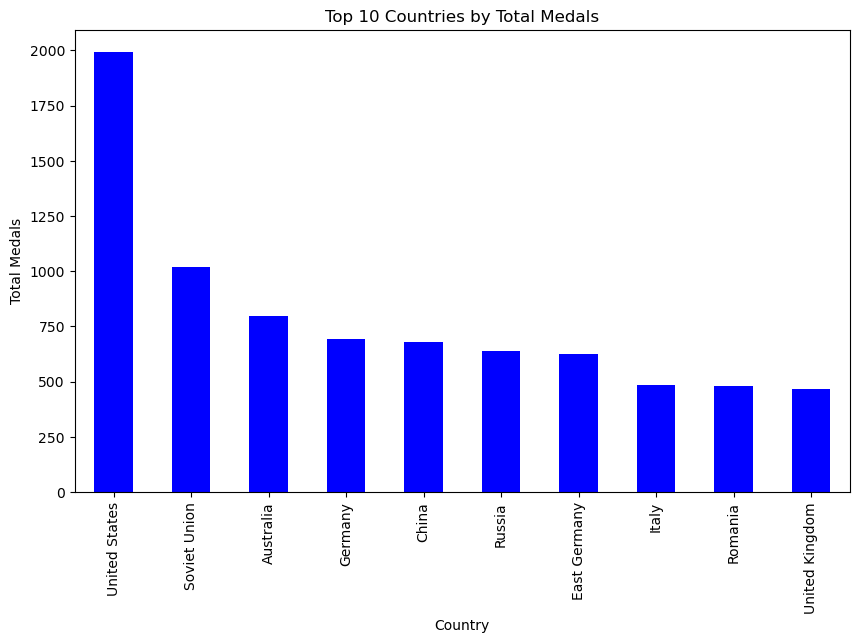

In [9]:
# Total Medals by Country
medals_by_country = df['Country'].value_counts().head(10)
plt.figure(figsize=(10,6))
medals_by_country.plot(kind='bar', color='blue')
plt.title("Top 10 Countries by Total Medals")
plt.xlabel("Country")
plt.ylabel("Total Medals")
plt.show()

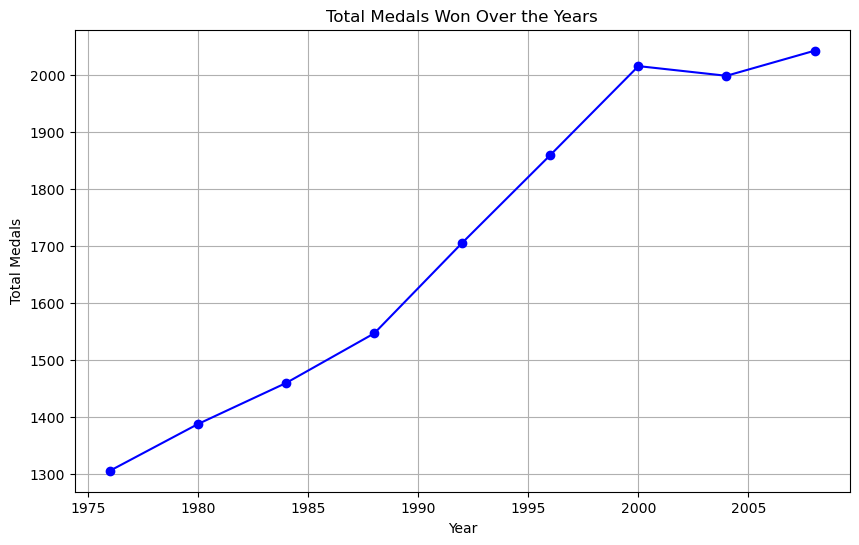

In [10]:
# Medals Over the Years
medals_by_year = df.groupby('Year')['Medal'].count()
plt.figure(figsize=(10,6))
plt.plot(medals_by_year, marker='o', linestyle='-', color='blue')
plt.title("Total Medals Won Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Medals")
plt.grid(True)
plt.show()

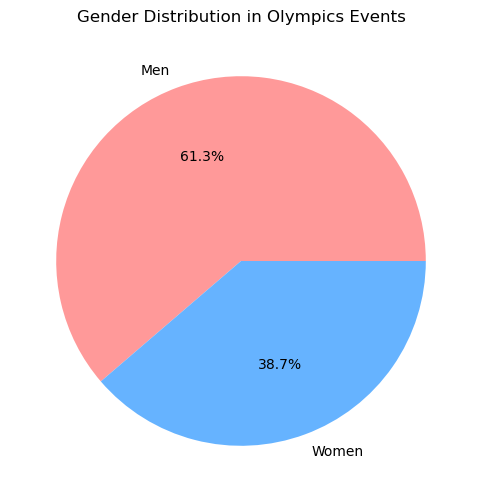

In [11]:
# Gender Distribution
plt.figure(figsize=(6,6))
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title("Gender Distribution in Olympics Events")
plt.ylabel('')
plt.show()

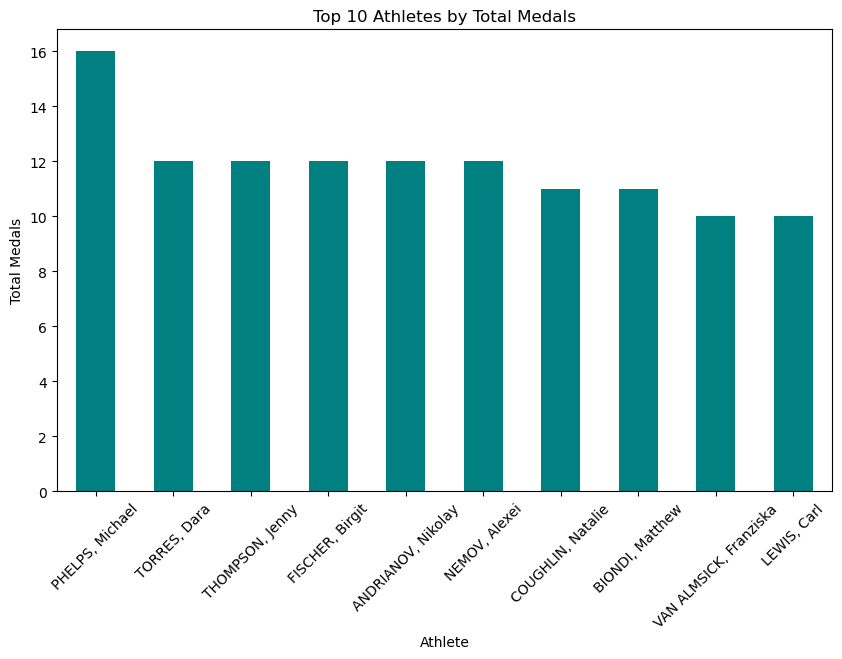

In [13]:
# Top 10 Athletes by Medals
top_athletes = df['Athlete'].value_counts().head(10)
plt.figure(figsize=(10,6))
top_athletes.plot(kind='bar', color='teal')
plt.title("Top 10 Athletes by Total Medals")
plt.xlabel("Athlete")
plt.ylabel("Total Medals")
plt.xticks(rotation=45)
plt.show()

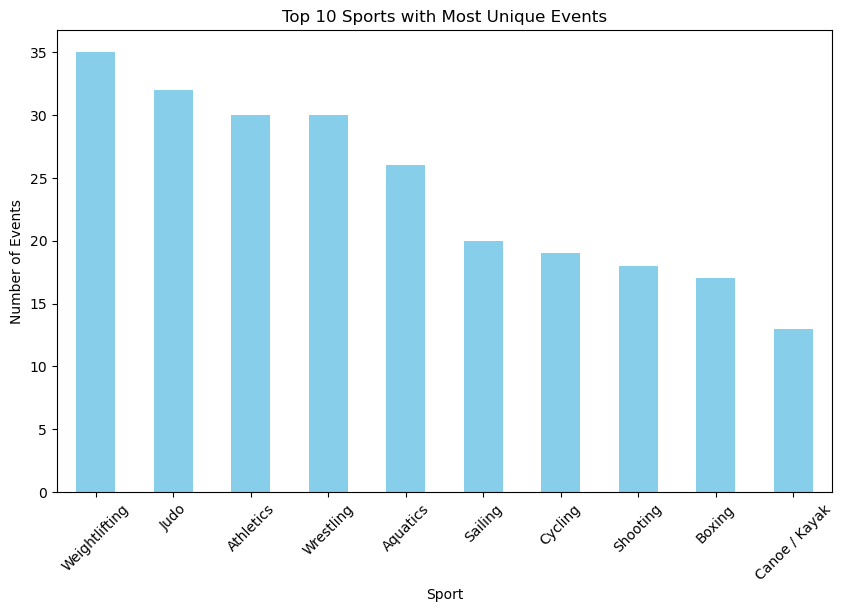

In [14]:
# Sports with Most Events
event_count = df[['Sport','Event']].drop_duplicates()['Sport'].value_counts().head(10)
plt.figure(figsize=(10,6))
event_count.plot(kind='bar', color='skyblue')
plt.title("Top 10 Sports with Most Unique Events")
plt.xlabel("Sport")
plt.ylabel("Number of Events")
plt.xticks(rotation=45)
plt.show()


In [15]:
# Encode categorical features
le = LabelEncoder()
df['Sport_enc'] = le.fit_transform(df['Sport'])
df['Gender_enc'] = le.fit_transform(df['Gender'])
df['Country_enc'] = le.fit_transform(df['Country'])

In [16]:
# Features & Target
X = df[['Sport_enc', 'Gender_enc', 'Country_enc']]
y = df['Medal']

In [17]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [18]:
print("\n Training Set Class Distribution:")
print(y_train.value_counts())


 Training Set Class Distribution:
Medal
Bronze    3681
Gold      3529
Silver    3511
Name: count, dtype: int64


In [21]:
if len(y_train.unique()) < 2:
    print("ERROR: y_train has only one class. Cannot train model.")
else:
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)


In [22]:
print("Unique Medal values BEFORE mapping:\n", df['Medal'].unique())


Unique Medal values BEFORE mapping:
 ['Silver' 'Bronze' 'Gold']


In [24]:
# Evaluation
print("Logistic Regression Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Evaluation:
Accuracy: 0.3601741022850925
Confusion Matrix:
 [[933 633  11]
 [787 716  10]
 [862 637   6]]
Classification Report:
               precision    recall  f1-score   support

      Bronze       0.36      0.59      0.45      1577
        Gold       0.36      0.47      0.41      1513
      Silver       0.22      0.00      0.01      1505

    accuracy                           0.36      4595
   macro avg       0.31      0.36      0.29      4595
weighted avg       0.32      0.36      0.29      4595

